In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option("display.max_rows", 999)
import numpy as np
from IPython.display import display

def read(fp):
    """ Reads a file into a dataframe"""
    df = pd.read_csv(fp)
    return df


people = read("data/people.csv")
activities_train = read("data/act_train.csv")
activities_test = read("data/act_test.csv")
print("Successfully loaded datasets!")

Successfully loaded datasets!


### Explore People

The first 10 characteristics of each person are nominal features that need to be encoded into numerical format for further analysis.  The rest of the characteristics are booleans, which can then be represented as either 0 or 1. Note that **`char_38`** is the only integer value, which will need to be normalized to not carry more weight than the other columns.  

In [2]:
# shape 
print("People df has {} rows and {} columns".format(people.shape[0], people.shape[1]))

# display first five people file
print(display(people.head()))

People df has 189118 rows and 41 columns


,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


None


### Explore Activities

There are nine characteristics associated with activities that are type 1.  Other activity categories do not contain these characteristics, but will contain char_10 information; type 1 does not contain any char_10 info.

In [496]:
print("Activities train df has {} rows and {} columns".format(activities_train.shape[0], activities_train.shape[1]))

# A look into type 1 activities
type_one_activity = display(activities_train[activities_train["activity_category"] == "type 1"][:5])
print("Activities test df has {} rows and {} columns".format(activities_test.shape[0], activities_test.shape[1]))

Activities train df has 2197291 rows and 15 columns


,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,type 3,type 6,type 8,NaN,0
105,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,type 1,type 4,type 1,NaN,0
106,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,type 4,type 5,type 1,NaN,0
107,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,type 2,type 4,type 2,NaN,0
108,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,type 1,type 6,type 8,NaN,0


Activities test df has 498687 rows and 14 columns


### Process dates

In [2]:
def col_to_datetime(df, column):
    """Converts a column to datetime
    
    Also drops the original datetime column
    """
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    return df

In [3]:
def process_date(df):
    """Extract year, month, day from datetime column"""
    df = df.copy()
    return (df.assign(year = lambda df: df.date.dt.year,
                      month = lambda df: df.date.dt.month,
                      day = lambda df: df.date.dt.day)
                      .drop('date', axis = 1))

### Normalize columns

In [4]:
def normalize(df, column):
    """Normalize a column"""
    df.copy()
    df[column] = df[[column]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    return df

### Missing values#

In [5]:
def drop(df, columns):
    """Drop column"""
    df = df.copy()
    return df.drop(columns, axis = 1)

### Categorical Variables

In [6]:
def process_cat_variables(df, columns, substring, prefix):
    """Categorical variables are converted into numbers"""
    df = df.copy()
    categorical_columns = [col for col, col_data in df.iteritems() if col_data.dtype == object and substring in col]
    df[categorical_columns] = (df[categorical_columns].fillna('type -999')
                                                      .apply(lambda column: column.str.lstrip(prefix).astype(int)))
    return df

### Booleans

In [7]:
def process_bool_columns(df, columns, substring):
    """Boolean categorical variables are also converted to numbers"""
    df = df.copy()
    bool_columns = [col for col, col_data in df.iteritems() if col_data.dtype == bool and substring in col]
    df[bool_columns] = df[bool_columns].apply(lambda column: column.astype(int))
    return df

### Combine Levels

Group several levels based on their frequency distribution.  

In [8]:
def bin_other_category(df, col):
    """Groups values into bins for the activity_category"""
    df = df.copy()
    df[col] = pd.cut(df[col], bins = 9, labels = False)
    return df

def bin_char_category(df, columns, substring):
    """
    Groups values into bins for categorical columns  that begin with 'char'
    """
    df = df.copy()
    bin_columns = [col for col, col_data in df.iteritems() if col_data.dtype == int and substring in col]
    df[bin_columns] = df[bin_columns].apply(lambda x: pd.cut(x, bins = 9, labels = False))
    return df

### One-hot Encoding

In [9]:
def one_hot_encode(df, substring, data_type):
    """Convert categorical variables into numerical format"""
    df = df.copy()
    cat_columns = [col for col, col_data in df.iteritems() if col_data.dtype == data_type and substring in col]
    dummies = pd.get_dummies(df[cat_columns])
    print dummies
    return pd.concat([df, dummies], axis = 1).drop(cat_columns, axis = 1)

### Fill Missing Values

In [10]:
def fill(df, column, value):
    """Fill missing values in a column with some specified value"""
    df = df.copy()
    df[column] = df[column].fillna(value = value)
    return df

### Method Chaining to clean people and activities data

In [11]:
def process_people(df):
    """Perform processing on people data
    
    Dates are transformed to datetime, 
    relevant columns are normalized, 
    categorical variables are encoded,
    levels are grouped into bins
    """
    df = df.copy()
    return (df.pipe(col_to_datetime, "date")
              .pipe(normalize, "char_38")
              .pipe(process_cat_variables, df.columns, "char", 'type ')
              .pipe(process_cat_variables, df.columns, "group", "group ")
              .pipe(bin_char_category, df.columns, "char")
              .pipe(process_bool_columns, df.columns, "char"))
              #.pipe(process_date)
              
processed_people = people.pipe(process_people)
processed_people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,8,17304,4,2021-06-29,0,1,4,2,3,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0.36
1,ppl_100002,8,8688,8,2021-01-06,5,2,4,2,3,1,3,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,0.76
2,ppl_100003,8,33592,8,2022-06-10,0,2,4,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0.99
3,ppl_100004,8,22593,8,2022-07-20,8,8,8,4,5,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.76
4,ppl_100006,8,6534,8,2022-07-27,8,8,8,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0.84


In [12]:
def process_activities(df):
    """Perform processing on activities data
    
    Dates are transformed to datetime, 
    categorical variables are encoded,
    missing values are replaced,
    levels are grouped into bins
    """
    df = df.copy()
    return (df.pipe(col_to_datetime, "date")
              
              .pipe(process_cat_variables, df.columns, "char", 'type ')
              .pipe(process_cat_variables, df.columns, "activity_cat", 'type ')
              .pipe(bin_other_category, "activity_category")
              .pipe(bin_char_category, df.columns, "char")
              .pipe(process_bool_columns, df.columns, "char"))
#.pipe(process_date)
              
# preprocess activites
processed_activities_train = activities_train.pipe(process_activities)
processed_activities_test = activities_test.pipe(process_activities)
processed_activities_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,4,0,0,0,0,0,0,0,0,0,0,0
1,ppl_100,act2_2434093,2022-09-27,1,0,0,0,0,0,0,0,0,0,0,0
2,ppl_100,act2_3404049,2022-09-27,1,0,0,0,0,0,0,0,0,0,0,0
3,ppl_100,act2_3651215,2023-08-04,1,0,0,0,0,0,0,0,0,0,0,0
4,ppl_100,act2_4109017,2023-08-26,1,0,0,0,0,0,0,0,0,0,0,0


### Join dataframes

Add data from the people dataframe to activity dataframes 

In [13]:
training_data = pd.merge(processed_activities_train, processed_people, on = 'people_id', how = 'left', suffixes=('_activities', '_people'))
test_data = pd.merge(processed_activities_test, processed_people, on = 'people_id', how = 'left', suffixes=('_activities', '_people'))

In [14]:
training_data.head()

,people_id,activity_id,date_activities,activity_category,char_1_activities,char_2_activities,char_3_activities,char_4_activities,char_5_activities,char_6_activities,char_7_activities,char_8_activities,char_9_activities,char_10_activities,outcome,char_1_people,group_1,char_2_people,date_people,char_3_people,char_4_people,char_5_people,char_6_people,char_7_people,char_8_people,char_9_people,char_10_people,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,4,0,0,0,0,0,0,0,0,0,0,0,8,17304,4,2021-06-29,0,1,4,2,3,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0.36
1,ppl_100,act2_2434093,2022-09-27,1,0,0,0,0,0,0,0,0,0,0,0,8,17304,4,2021-06-29,0,1,4,2,3,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0.36
2,ppl_100,act2_3404049,2022-09-27,1,0,0,0,0,0,0,0,0,0,0,0,8,17304,4,2021-06-29,0,1,4,2,3,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0.36
3,ppl_100,act2_3651215,2023-08-04,1,0,0,0,0,0,0,0,0,0,0,0,8,17304,4,2021-06-29,0,1,4,2,3,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0.36
4,ppl_100,act2_4109017,2023-08-26,1,0,0,0,0,0,0,0,0,0,0,0,8,17304,4,2021-06-29,0,1,4,2,3,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0.36


### Groups Exploration

In [15]:
def outcome_changes(df):
    """Get rows with outcome changes
    
    Outcome changes occur when an outcome for an activity differs from the most frequent outcome of the group
    """
    df = df.copy()
    
    unique_groups = df.group_1.unique()
    changes = pd.DataFrame(columns = ["people_id", "date_activities", "activity_id", "group_1", "outcome"])
    group_data = None
    most_frequent_outcome = None
    changed = None
    
    for i, group in enumerate(unique_groups):
        # get unique group data
        group_data = df[df.group_1 == group]

        # get most frequent outcome
        most_frequent_outcome = group_data.outcome.value_counts().idxmax()

        # get rows with outcome changes
        changed = group_data[group_data.outcome != most_frequent_outcome]

        if changed.empty:
            pass
        else:
            changes = changes.append(changed, ignore_index = True)
            
    changes.loc[:,"outcome_changed"] = 1
    changes = changes.loc[:,("people_id", "activity_id", "date_activities", "group_1", "outcome_changed")]
    #df = pd.merge(df, changes, on = 'activity_id', how = 'left')
    return changes

# lets work with a few relevant columns for this problem
train = training_data[["people_id", "activity_id", "date_activities", "group_1", "outcome"]]
changes_train = outcome_changes(train)


Here we find the outcome changes and then find the number of changes per group.  The frequency column is then binned into categories.  The sample below shows zeroes as values in the `outcome_changed` column, but keep in mind that these are bins, not continuous values

In [16]:
processed_changes_train = (changes_train.groupby(["group_1"], sort = False, as_index = False).sum()
                                        .pipe(bin_other_category, "outcome_changed"))
                           
print (display(processed_changes_train.head()))

,group_1,outcome_changed
0,19662.0,0
1,627.0,0
2,678.0,0
3,18441.0,0
4,14038.0,0


None


In [17]:
# Merge outcome changes with train and test data

# an arbitrary number that will replace missing values in the outcome_changed column
fill_value = 11

training_data_processed = (pd.merge(training_data, processed_changes_train, on = 'group_1', how = 'left')
                           .pipe(fill, column = "outcome_changed", value = fill_value))
                            
test_data_processed = (pd.merge(test_data, processed_changes_train, on = 'group_1', how = 'left')
                           .pipe(fill, column = "outcome_changed", value = fill_value))

In [18]:
dummies = pd.get_dummies(training_data_processed["outcome_changed"], prefix = "outcome_changed")
training_data_processed = (pd.concat([training_data_processed, dummies], axis = 1)
                           .drop(["outcome_changed"], axis = 1))

In [19]:
dummies = pd.get_dummies(test_data_processed["outcome_changed"], prefix = "outcome_changed")
test_data_processed = (pd.concat([test_data_processed, dummies], axis = 1)
                           .drop(["outcome_changed"], axis = 1))

,people_id,activity_id,date_activities,activity_category,char_1_activities,char_2_activities,char_3_activities,char_4_activities,char_5_activities,char_6_activities,char_7_activities,char_8_activities,char_9_activities,char_10_activities,char_1_people,group_1,char_2_people,date_people,char_3_people,char_4_people,char_5_people,char_6_people,char_7_people,char_8_people,char_9_people,char_10_people,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38,outcome_changed
0,ppl_100004,act1_249281,2022-07-20,0,8,8,8,8,8,8,8,8,8,0,8,22593,8,2022-07-20,8,8,8,4,5,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.76,11.0
1,ppl_100004,act2_230855,2022-07-20,5,0,0,0,0,0,0,0,0,0,1,8,22593,8,2022-07-20,8,8,8,4,5,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0.76,11.0
2,ppl_10001,act1_240724,2022-10-14,0,8,8,8,8,8,8,8,8,8,0,8,25417,8,2022-10-14,1,1,3,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.90,11.0
3,ppl_10001,act1_83552,2022-11-27,0,8,8,8,8,8,8,8,8,8,0,8,25417,8,2022-10-14,1,1,3,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.90,11.0
4,ppl_10001,act2_1043301,2022-10-15,5,0,0,0,0,0,0,0,0,0,3,8,25417,8,2022-10-14,1,1,3,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.90,11.0


None


### Partition Training and Testing Sets

In [20]:
# class label
y_train = training_data["outcome"]

cols = ["people_id", "activity_id", "date_activities", "date_people"]
X_train = (training_data_processed.pipe(drop, cols)
                        .pipe(drop, ["outcome"]))
X_test = test_data_processed.pipe(drop, cols)

### Feature Importance

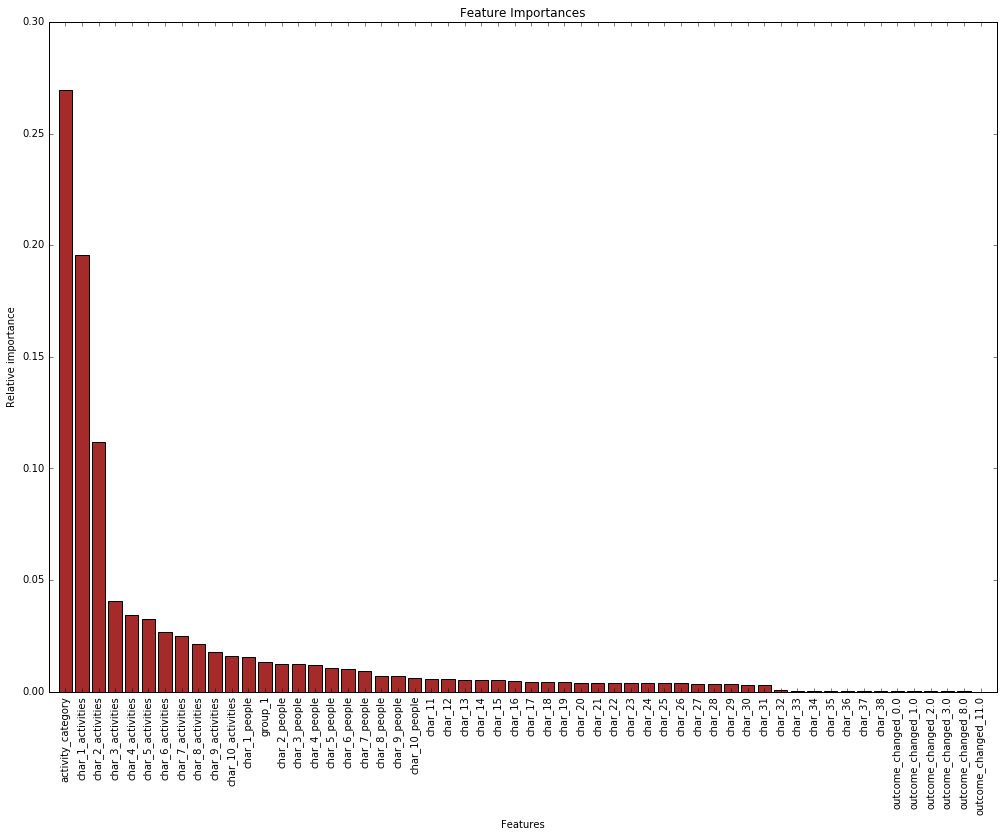

In [191]:
from sklearn.ensemble import RandomForestClassifier

# get feature columns
feat_labels = X_train.columns

# init forest
forest = RandomForestClassifier(n_estimators = 150, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(17,12))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color = 'brown', align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Relative importance')
#plt.tight_layout()
plt.show()

In [196]:
relevant_feats = ["activity_category", "char_1_activities", "char_2_activities", "char_3_activities",
                 "char_4_activities", "char_5_activities", "char_6_activities", "char_7_activities",
                 "char_8_activities", "char_9_activities", "char_10_activities", "char_1_people", "group_1"]

X_train_transform = X_train[relevant_feats]
X_test_transform = X_test[relevant_feats]

In [21]:
# create validation set
def split(X, y):
    mini_train_size = int(X.shape[0] * .8)
    X_train_mini, X_val = X.iloc[:mini_train_size], X.iloc[mini_train_size:]
    y_train_mini, y_val = y[:mini_train_size], y[mini_train_size:]
    return X_train_mini, X_val, y_train_mini, y_val

X_train_mini, X_val, y_train_mini, y_val = split(X_train, y_train)

### Pipeline transforms with estimator, then get cross val scores

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.lda import LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.cross_validation import cross_val_score

def cross_val(X, y):
    scores = cross_val_score(estimator = pipe_lr,
                                         X = X,
                                         y = y,
                                         cv = 5,
                                         n_jobs = 1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [207]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1))])

cross_val(X_train_mini, y_train_mini)

CV accuracy scores: [ 0.84  0.81  0.81  0.85  0.86]
CV accuracy: 0.835 +/- 0.020


### Tune hyperparams with grid search

In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost as xgb


def perform_grid_search(est, param_grid):
    gs = GridSearchCV(estimator=est, 
                      param_grid=param_grid, 
                      scoring='accuracy', 
                      cv=2,
                      n_jobs=-1)

    gs = gs.fit(X_train_mini, y_train_mini)
    print(gs.best_score_)
    print(gs.best_params_)


### Max Depth Tune

In [ ]:
# initial params to test
param_grid = {'clf__max_depth': [5, 10, 15, 20, 25, 30]}
init_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', xgb.XGBClassifier(**init_params))])

perform_grid_search(est = pipe_lr, param_grid = param_grid)

In [52]:
# optimal depth using Grid Search 
opt_depth = 30

### Min Child Weight Tune

In [32]:
param_grid = {'clf__min_child_weight': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]}

gbm = xgb.XGBClassifier(max_depth = opt_depth, n_estimators=300, learning_rate=0.05)
perform_grid_search(est = gbm, param_grid = param_grid)
""" 
acc_scores = []
for depth in max_depth_params:
    gbm = xgb.XGBClassifier(max_depth=depth, n_estimators=300, learning_rate=0.05).fit(X_train_mini, y_train_mini)
    y_pred_test = gbm.predict(X_val)
    acc_scores.append(accuracy_score(y_val, y_pred_test))
"""


### Metrics

f1 score on training set: 0.978312801476
f1 score on testing set: 0.892870206208
('Area under the curve:', 0.89772853958389986)
Accuracy score on training set 0.980906594032
Accuracy score on test set 0.895364527749


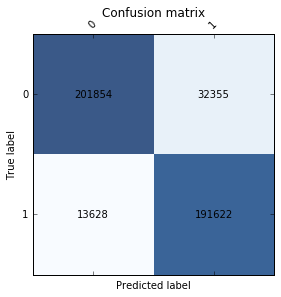

In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def predict(clf, X_train, y_train, X_test):
    #clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    return y_pred_train, y_pred_test

def calc_metrics(clf, y_pred_train, y_pred_test, y_test):
    # f1 scores
    print "f1 score on training set:", f1_score(y_train_mini, y_pred_train)
    print "f1 score on testing set:", f1_score(y_test, y_pred_test)

    # area under curve
    auc_score = roc_auc_score(y_test, y_pred_test)
    print("Area under the curve:", auc_score)
    
    # accuracy
    print "Accuracy score on training set", accuracy_score(y_train_mini, y_pred_train)
    print "Accuracy score on test set", accuracy_score(y_test, y_pred_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true = y_test, y_pred = y_pred_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cm)
    plt.show()
    
def plot_confusion_matrix(cm, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    fig, ax = plt.subplots(figsize = (4, 4))
    class_labels = ["0", "1"]
    ax.matshow(cm, cmap = plt.cm.Blues, alpha = .8)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    plt.title(title)
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# validation predictions & metrics
gbm = xgb.XGBClassifier(max_depth = 30, n_estimators=300, learning_rate=0.05).fit(X_train_mini, y_train_mini)
y_pred_train, y_pred_test = predict(gbm, X_train_mini, y_train_mini, X_val)
calc_metrics(pipe_lr, y_pred_train, y_pred_test, y_val)

### Final Model

In [40]:
# predictions for test set
gbm = xgb.XGBClassifier(max_depth = 30, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
# calc predictions on test set
y_pred_test = gbm.predict(X_test)

### Output

In [49]:
activity_ids = activities_test["activity_id"]
output = pd.DataFrame({"activity_id": activity_ids, "outcome": y_pred_test})
output.to_csv("performance/prediction.csv", header=True, index=False)